In [2]:
%matplotlib inline

In [79]:
from boilerplate import *
import os, sys
import functional_vectorizer
from dio import dataio
from scipy import fftpack, signal
from imp import reload

In [54]:
# LSTM and CNN for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)

In [55]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((25000,), (25000,), (25000,), (25000,))


In [57]:
len(X_train[0])

218

In [ ]:
assert 0, 'dont run'
model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [139]:
data = np.load('/run/media/mike/Elements/data/kaggle/melbourne/vectors/simple_fft_vectorizedata_train_1_X.npy')
Y = np.load('/run/media/mike/Elements/data/kaggle/melbourne/vectors/simple_fft_vectorizedata_train_1_Y.npy')

In [44]:
print(data.shape, Y.shape, np.mean(Y, axis=0))

((1301, 6000), (1301, 2), array([ 0.88547271,  0.11452729]))


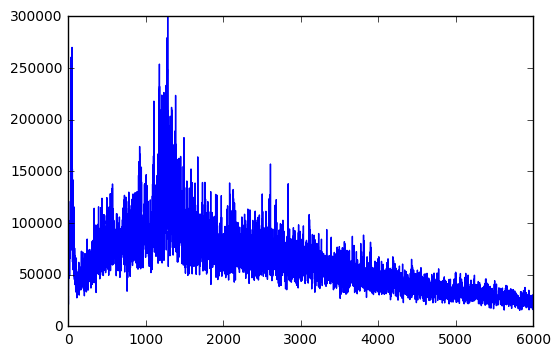

In [33]:
plt.plot(data[20])

In [15]:
# data = dataio.get_matlab_eeg_data_ary('/home/mike/data/train/1_1001_0.mat')

In [38]:
data.shape

(1301, 6000)

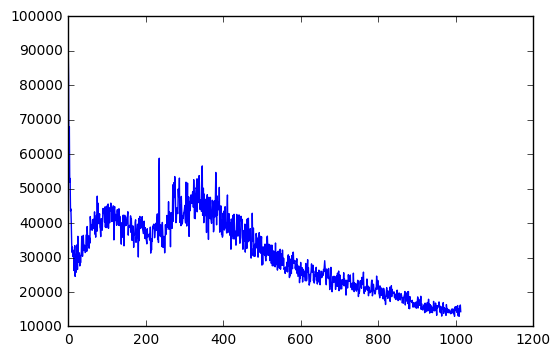

In [172]:
ds = signal.resample(data[:8], 1024, axis=1)
plt.plot(ds[0,10:])

In [136]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
n_input_len=ds.shape[1]
model = Sequential()
# model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Convolution1D(nb_filter=64, filter_length=8, input_dim=1, 
                        input_length=n_input_len, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(LSTM(100))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution1d_7 (Convolution1D)  (None, 256, 64)       576         convolution1d_input_5[0][0]      
____________________________________________________________________________________________________
maxpooling1d_5 (MaxPooling1D)    (None, 128, 64)       0           convolution1d_7[0][0]            
____________________________________________________________________________________________________
lstm_5 (LSTM)                    (None, 100)           66000       maxpooling1d_5[0][0]             
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 2)             202         lstm_5[0][0]                     
Total params: 66778
_______________________________________________________________________

In [106]:
os.chdir('/home/mike/ve/ml/')
from eegkaggle.dio import dataio
reload(dataio)

<module 'eegkaggle.dio.dataio' from 'eegkaggle/dio/dataio.pyc'>

In [101]:
ds.shape

(1301, 256)

In [140]:
d0, d1, dt = dataio.separate_sets(ds, Y[:,1])
print(d0.shape, d1.shape)
x,y = dataio.subdiv_and_shuffle(ds, Y[:,1], resample='up')

((1152, 256), (149, 256))


In [141]:
len(y)

2344

In [142]:
np.mean(y)

0.50853242320819114

In [143]:
y

array([[ 1.],
       [ 0.],
       [ 1.],
       ..., 
       [ 1.],
       [ 1.],
       [ 1.]])

In [163]:
Y = np.asarray(y == 1).ravel()
print(Y)
Y = np.stack([Y, ~Y], axis=1)
print(Y.shape)
Y = np.array(Y, dtype=int)
print(Y.shape)
np.mean(Y[:,0])

[ True False  True ...,  True  True  True]
(2344, 2)
(2344, 2)


0.50853242320819114

(2344, 2, 2, 1)
(2344, 2, 2, 1)


0.5

In [147]:
X_train = x.reshape(-1, 256,1)
X_train /= np.amax(X_train)
y_train = Y # .reshape(-1, 2)
print(X_train.shape, y_train.shape)
model.fit(X_train, y_train, nb_epoch=30, batch_size=64, validation_split=0.2 )

((2344, 256, 1), (2344, 2))
Train on 1875 samples, validate on 469 samples
Epoch 1/30
1875/1875 [==============================] - 6s - loss: 0.6852 - acc: 0.5565 - val_loss: 0.7714 - val_acc: 0.4542
Epoch 2/30
1875/1875 [==============================] - 6s - loss: 0.6949 - acc: 0.5021 - val_loss: 0.6972 - val_acc: 0.4542
Epoch 3/30
1875/1875 [==============================] - 6s - loss: 0.6916 - acc: 0.5221 - val_loss: 0.6960 - val_acc: 0.4542
Epoch 4/30
1875/1875 [==============================] - 6s - loss: 0.6895 - acc: 0.5288 - val_loss: 0.6941 - val_acc: 0.4659
Epoch 5/30
1875/1875 [==============================] - 6s - loss: 0.6818 - acc: 0.5755 - val_loss: 0.6735 - val_acc: 0.5917
Epoch 6/30
1875/1875 [==============================] - 6s - loss: 0.6426 - acc: 0.6547 - val_loss: 0.7863 - val_acc: 0.4542
Epoch 7/30
1875/1875 [==============================] - 6s - loss: 0.7066 - acc: 0.5037 - val_loss: 0.6883 - val_acc: 0.5458
Epoch 8/30
1875/1875 [============================

In [148]:
pr = model.predict_classes(X_train)

2344/2344 [==============================] - 4s     


In [150]:
np.sum(pr)

911

In [151]:
pr.shape

(2344,)

In [157]:
np.mean(pr == y_train[:,1])

0.67875426621160406